In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
import numpy as np

In [3]:
from sa_utils import plot_f, OneDNode, simulated_annealing, hill_climbing

In [5]:
def one_d_f(c=1):
    return lambda x: -((x/c)**5)-2*((x/c)**4)+13*((x/c)**3)+14*((x/c)**2)-24*(x/c)

In [6]:
search_space = [-40, 30]

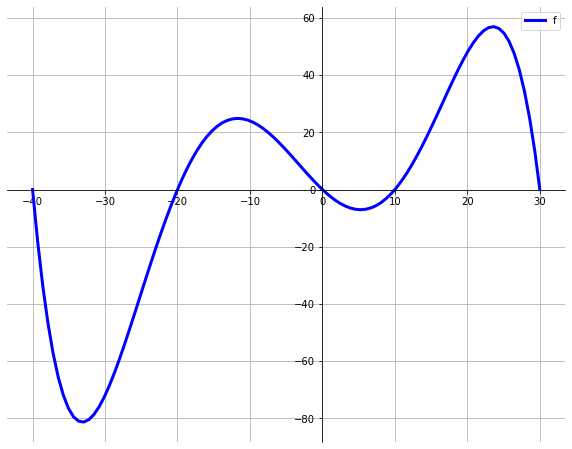

In [7]:
ax = plot_f(one_d_f(c=10), *search_space)

In [8]:
OneDNode._value_f = one_d_f(c=10)
OneDNode._boundaries = search_space
OneDNode._actions = [-2, -1, -0.5, 0.5, 1, 2]

initial_n = OneDNode(0)

In [9]:
solution_n = hill_climbing(initial_n)

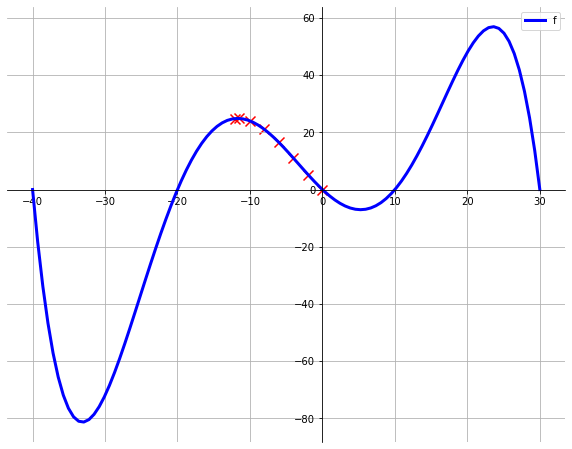

In [10]:
sol_path = solution_n.path()
x = []
y = []
for sp in sol_path:
    x.append(sp.state)
    y.append(sp.value())
    #y.append(sp.value()+(RANDOM_STATE.random()-0.5)*10)
ax = plot_f(one_d_f(c=10), *search_space)
ax.scatter(x, y, marker='x', c='r', s=100)

In [11]:
def exp_schedule(k, lam):
    """One possible schedule function for simulated annealing"""
    return lambda t: k * np.exp(-lam * t)

In [12]:
def plot_prob(ax, ti, temp_schedule, max_iter, delta_e):
    probs = []
    for t in range(max_iter):
        T = temp_schedule(t)
        p = np.exp(delta_e/T)
        probs.append(p)
    ax.plot(range(len(probs)), probs, label=ti)

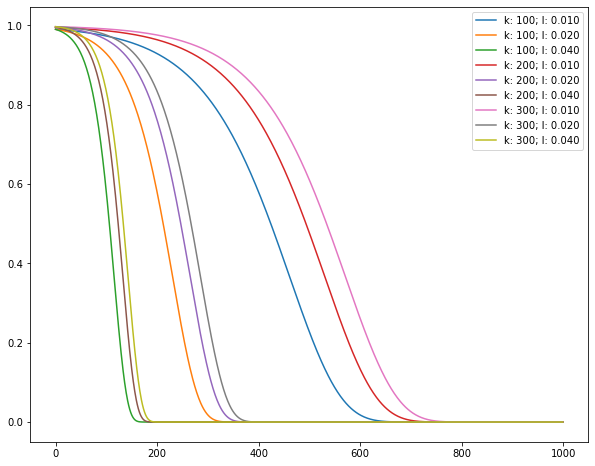

In [13]:
_, ax = plt.subplots()

ks = [100, 200, 300]
ls = [0.01, 0.02, 0.04]

for k in ks:
    for l in ls:
        plot_prob(ax, "k: {:d}; l: {:.3f}".format(k, l), exp_schedule(k=k, lam=l), max_iter=1000, delta_e=-1)


# plot_prob(ax, "0.015", exp_schedule(k=200, lam=0.015), max_iter=500, delta_e=-10)
# plot_prob(ax, "0.025", exp_schedule(k=200, lam=0.025), max_iter=500, delta_e=-10)
# plot_prob(ax, "k, 0.025", exp_schedule(k=300, lam=0.025), max_iter=500, delta_e=-10)

ax.legend()

In [23]:
solution_n = simulated_annealing(initial_n, exp_schedule(k=200, lam=0.01), 1000, np.random.RandomState(3))
solution_n

Node: 23.5

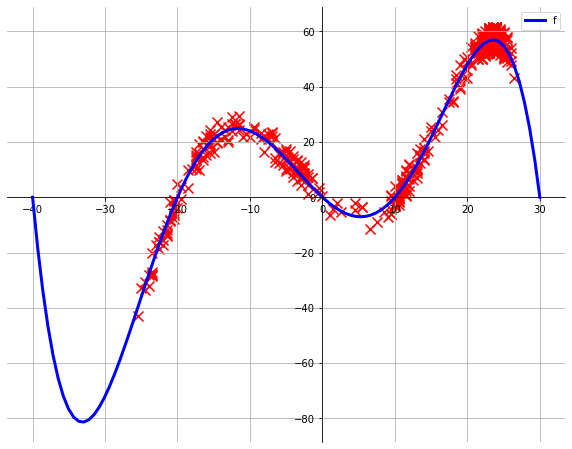

In [24]:
random_state = np.random.RandomState(0)

sol_path = solution_n.path()
x = []
y = []
for sp in sol_path:
    x.append(sp.state)
    #y.append(sp.value())
    y.append(sp.value()+(random_state.random()-0.5)*10)

ax = plot_f(one_d_f(c=10), *search_space)
ax.scatter(x, y, marker='x', c='r', s=100)

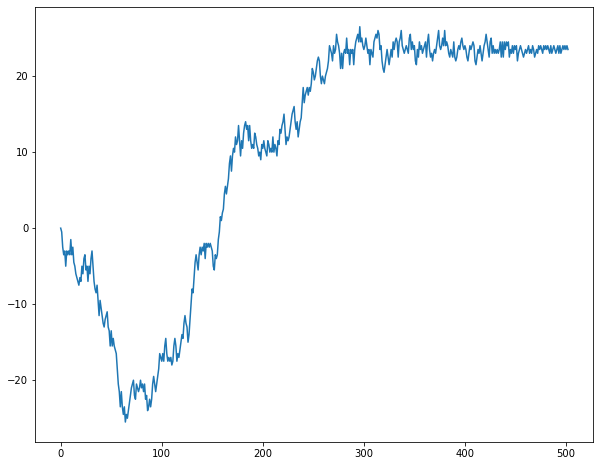

In [25]:
plt.plot(range(len(x)), x)

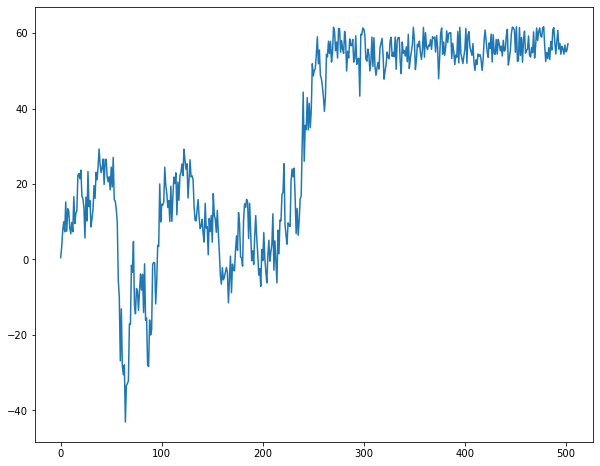

In [26]:
plt.plot(range(len(y)), y)